In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression

https://github.com/Ilincalink/ML-fundamentals-2025.git

In [33]:
df= pd.read_csv("hour.csv")

In [34]:
df.head

<bound method NDFrame.head of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0

# Step 1

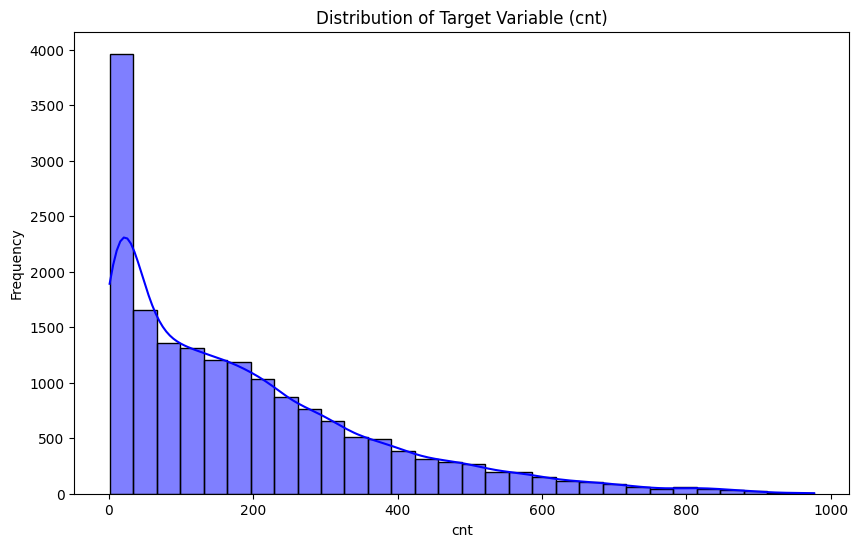

Skewness of cnt: 1.2774116037490577


In [35]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], kde=True, bins=30, color='blue')
plt.title('Distribution of Target Variable (cnt)')
plt.xlabel('cnt')
plt.ylabel('Frequency')
plt.show()

# Check skewness of the target variable
print(f'Skewness of cnt: {df["cnt"].skew()}')

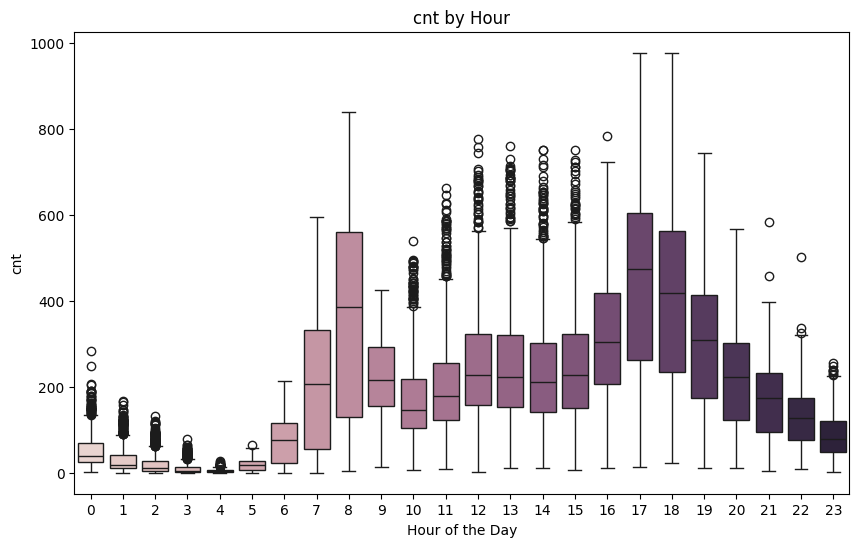

In [36]:
# Plot cnt by hour with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='hr', y='cnt', data=df, hue='hr', legend=False)
plt.title('cnt by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('cnt')
plt.show()


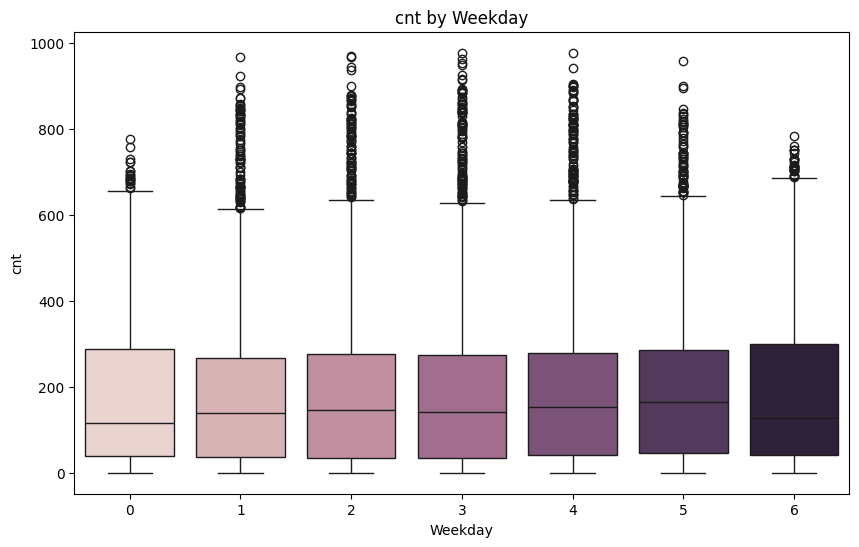

In [37]:
# Plot cnt by weekday with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=df, hue='weekday', legend=False)
plt.title('cnt by Weekday')
plt.xlabel('Weekday')
plt.ylabel('cnt')
plt.show()


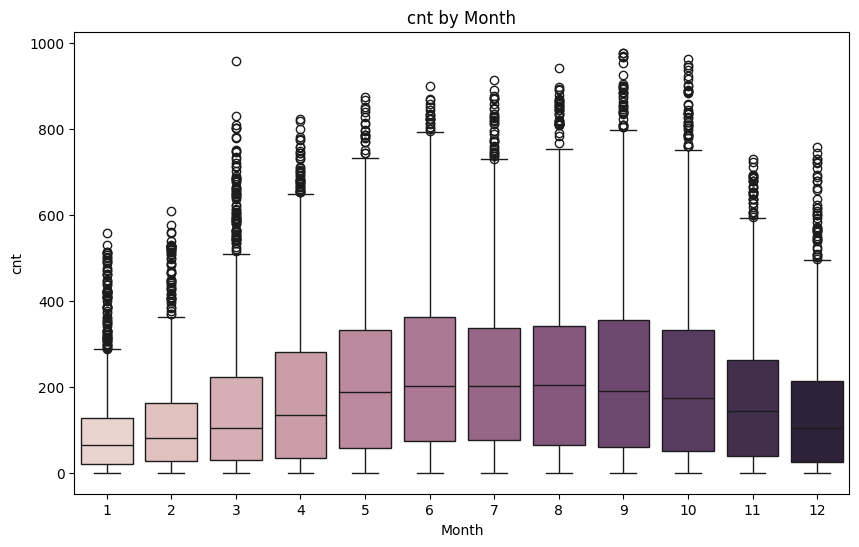

In [38]:
# Plot cnt by month with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='mnth', y='cnt', data=df, hue='mnth', legend=False)
plt.title('cnt by Month')
plt.xlabel('Month')
plt.ylabel('cnt')
plt.show()


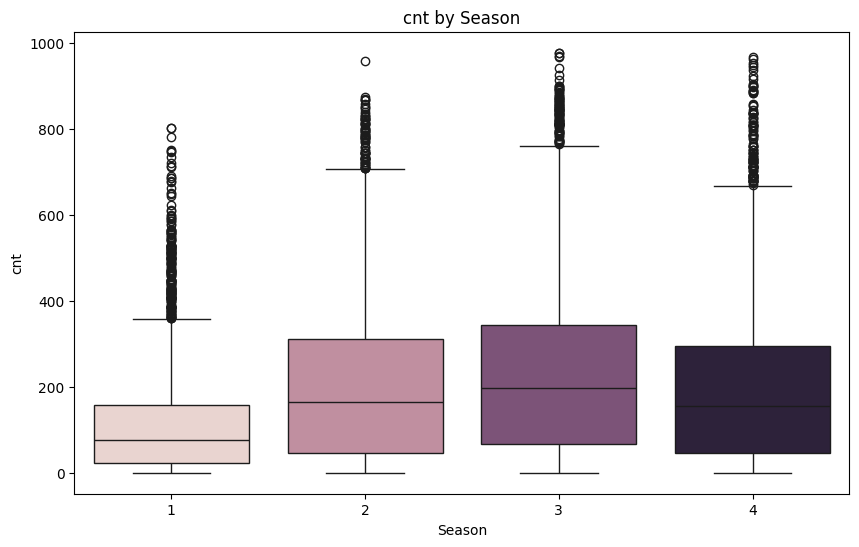

In [39]:
# Plot cnt by season with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df, hue='season', legend=False)
plt.title('cnt by Season')
plt.xlabel('Season')
plt.ylabel('cnt')
plt.show()


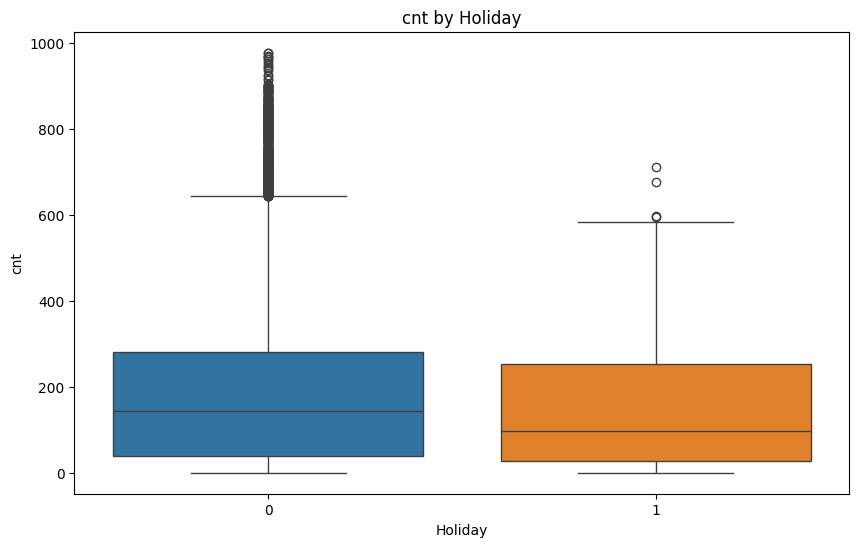

In [40]:
# Plot cnt by holiday with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='cnt', data=df, hue='holiday', legend=False)
plt.title('cnt by Holiday')
plt.xlabel('Holiday')
plt.ylabel('cnt')
plt.show()



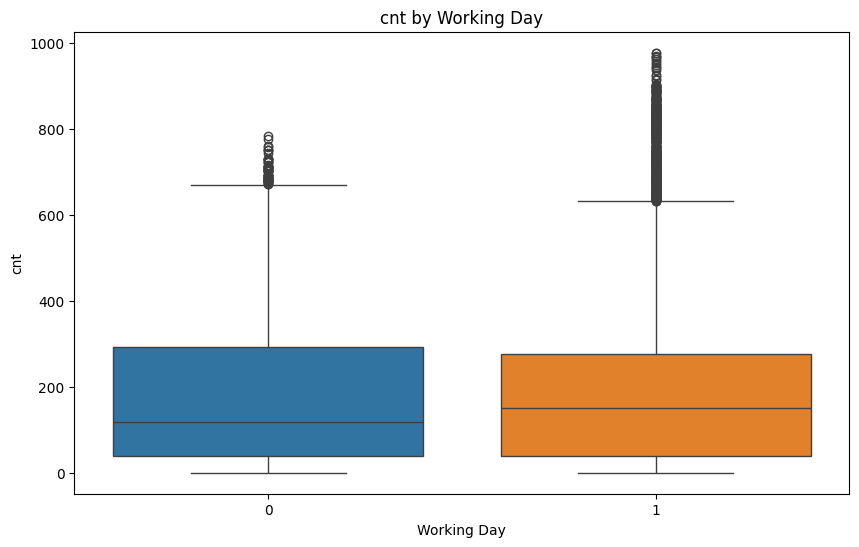

In [41]:
# Plot cnt by workingday with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=df, hue='workingday', legend=False)
plt.title('cnt by Working Day')
plt.xlabel('Working Day')
plt.ylabel('cnt')
plt.show()


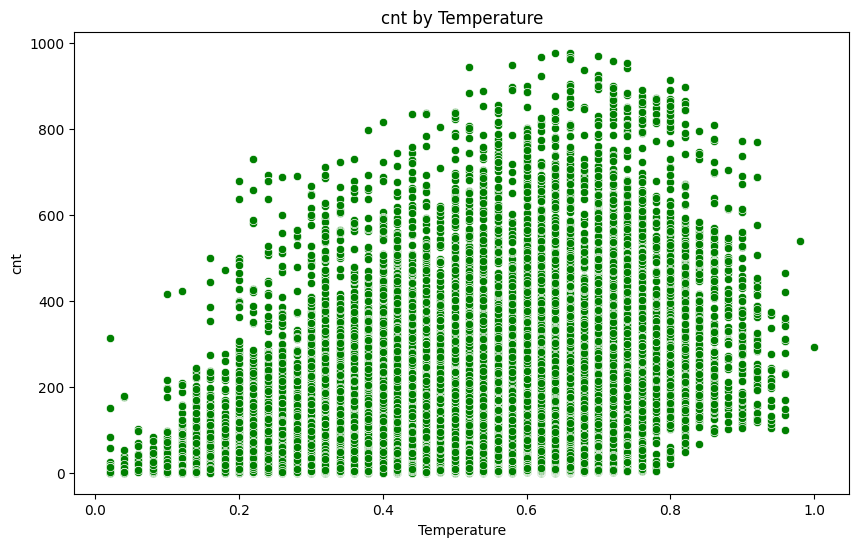

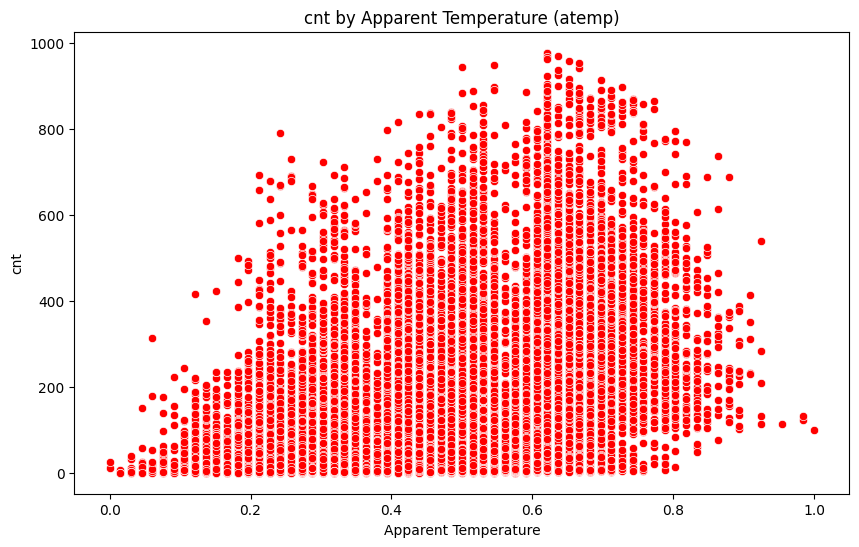

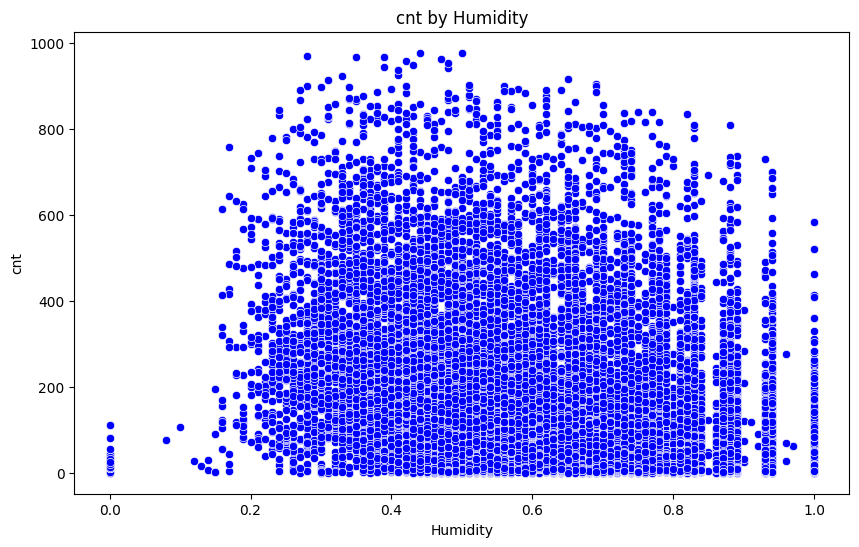

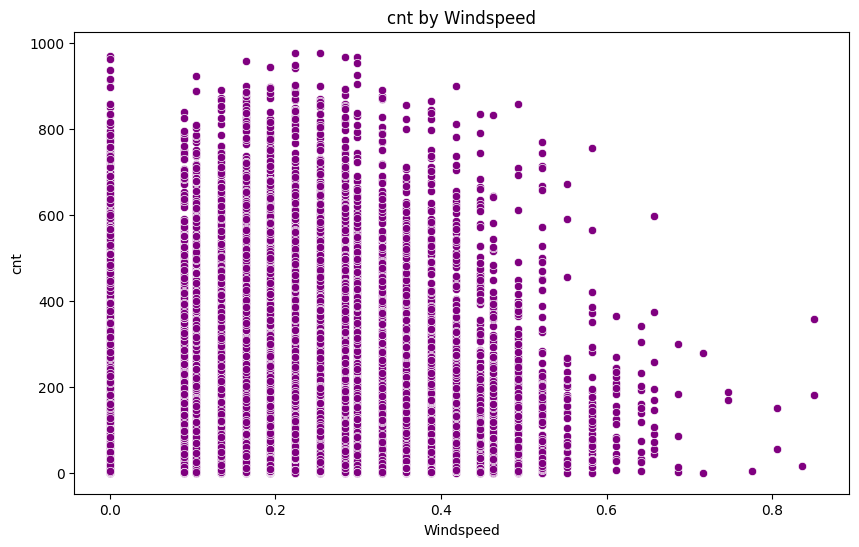

In [42]:
# Plot cnt by temperature (temp)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df, color='green')
plt.title('cnt by Temperature')
plt.xlabel('Temperature')
plt.ylabel('cnt')
plt.show()

# Plot cnt by apparent temperature (atemp)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='atemp', y='cnt', data=df, color='red')
plt.title('cnt by Apparent Temperature (atemp)')
plt.xlabel('Apparent Temperature')
plt.ylabel('cnt')
plt.show()

# Plot cnt by humidity (hum)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df, color='blue')
plt.title('cnt by Humidity')
plt.xlabel('Humidity')
plt.ylabel('cnt')
plt.show()

# Plot cnt by windspeed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df, color='purple')
plt.title('cnt by Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('cnt')
plt.show()


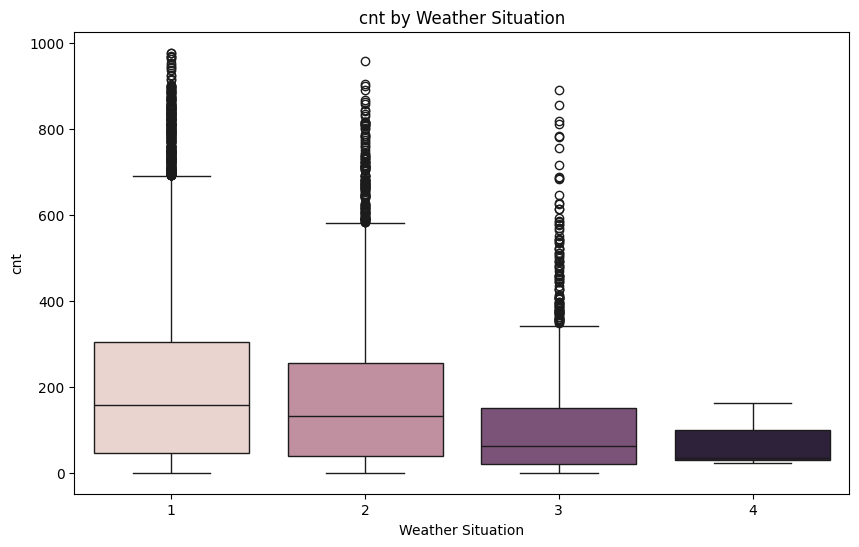

In [43]:
# Plot cnt by weather situation (weathersit)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df, hue='weathersit', legend=False)
plt.title('cnt by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('cnt')
plt.show()


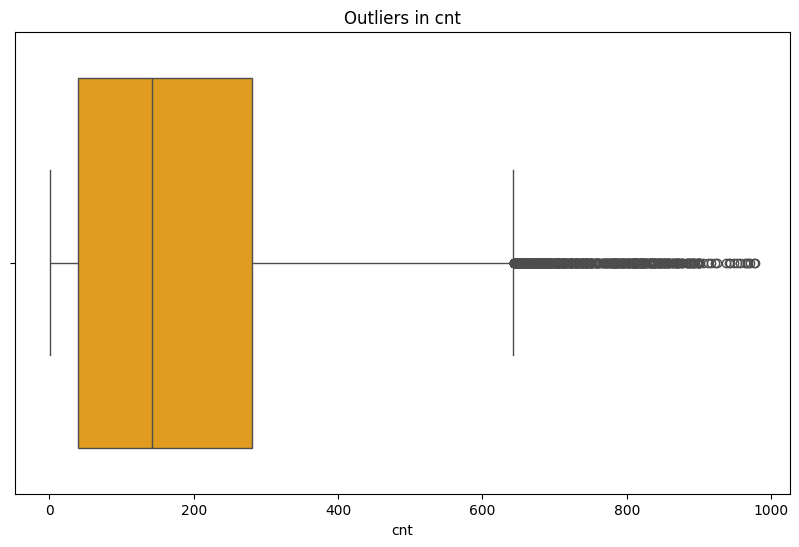

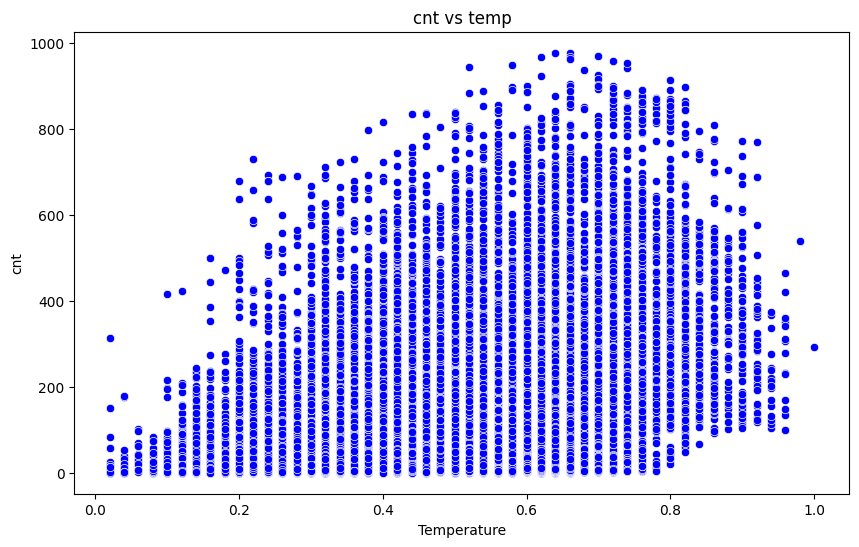

In [44]:
# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='cnt', data=df, color='orange')
plt.title('Outliers in cnt')
plt.show()

# Scatter plot for cnt vs. temp, temp being a weather-related feature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df, color='blue')
plt.title('cnt vs temp')
plt.xlabel('Temperature')
plt.ylabel('cnt')
plt.show()


In [45]:
# Drop the irrelevant columns
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# Verify the new structure of the dataframe
df.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [46]:
correlation_matrix = df.corr()
print(correlation_matrix)


              season        yr      mnth        hr   holiday   weekday  \
season      1.000000 -0.010742  0.830386 -0.006117 -0.009585 -0.002335   
yr         -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
mnth        0.830386 -0.010473  1.000000 -0.005772  0.018430  0.010400   
hr         -0.006117 -0.003867 -0.005772  1.000000  0.000479 -0.003498   
holiday    -0.009585  0.006692  0.018430  0.000479  1.000000 -0.102088   
weekday    -0.002335 -0.004485  0.010400 -0.003498 -0.102088  1.000000   
workingday  0.013743 -0.002196 -0.003477  0.002285 -0.252471  0.035955   
weathersit -0.014524 -0.019157  0.005400 -0.020203 -0.017036  0.003311   
temp        0.312025  0.040913  0.201691  0.137603 -0.027340 -0.001795   
atemp       0.319380  0.039222  0.208096  0.133750 -0.030973 -0.008821   
hum         0.150625 -0.083546  0.164411 -0.276498 -0.010588 -0.037158   
windspeed  -0.149773 -0.008740 -0.135386  0.137252  0.003988  0.011502   
cnt         0.178056  0.250495  0.1206

From this correlation table we can see that atemp and temp are very highly correlated and that this could also be the case for holiday and workingday even though it is not as drastic. I will look into this in the future to make sure no other variables are 'leaky' or redundant. 

# Step 2

In [47]:


# Sort the data by year (yr), month (mnth), and hour (hr) to ensure temporal order
df = df.sort_values(by=['yr', 'mnth', 'hr'])

# Calculate the number of rows in the dataset
n_rows = len(df)

# Calculate split indices
train_size = int(0.6 * n_rows)
validation_size = int(0.2 * n_rows)

# Split the dataset
train_data = df[:train_size]
validation_data = df[train_size:train_size + validation_size]
test_data = df[train_size + validation_size:]

# Print the size of each split
print(f"Training set size: {train_data.shape[0]}")
print(f"Validation set size: {validation_data.shape[0]}")
print(f"Test set size: {test_data.shape[0]}")


Training set size: 10427
Validation set size: 3475
Test set size: 3477


In [48]:
# Check the total number of rows in the dataset
total_rows = len(df)
print(f"Total number of rows in the dataset: {total_rows}")

# Verify the sum of the splits
assert (train_data.shape[0] + validation_data.shape[0] + test_data.shape[0]) == total_rows, "The split sizes don't add up!"


Total number of rows in the dataset: 17379


To make sure my data in temporaly correct and put in order, I ordered it by month, year, hour, to make sure that the training set was before the validation which came before the test set. I did this to ensure that my groups would not contain data leakage therefore giving me better results. Finally, in the second part of my code I checked the total number of rows in my dataset to make sure that it is the sum that i get from adding the test, training and validation sets in order to make sure all my data is used efficiently and effectively. 

# Step 3

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('hour.csv')

# Step 1: Encode cyclical features (hr, weekday)
def encode_cyclical(df, column, max_value):
    df[column + '_sin'] = np.sin(2 * np.pi * df[column] / max_value)
    df[column + '_cos'] = np.cos(2 * np.pi * df[column] / max_value)
    return df

# Apply cyclical encoding to 'hr' (hour of the day) and 'weekday'
df = encode_cyclical(df, 'hr', 24)  # 24 hours in a day
df = encode_cyclical(df, 'weekday', 7)  # 7 days in a week

# Step 2: One-hot encoding for categorical features (season, weathersit, mnth)
# We can apply this after splitting to avoid data leakage
categorical_columns = ['season', 'weathersit', 'mnth']

# Step 3: Apply scaling (StandardScaler) to continuous features (temp, hum, windspeed)
# Remove 'atemp' from the continuous features list as it's dropped later in the code
continuous_columns = ['temp', 'hum', 'windspeed', 'temp_hum_interaction']

# Step 4: Interaction terms (temp * hum)
df['temp_hum_interaction'] = df['temp'] * df['hum']

# Step 5: Remove leaky or redundant features (e.g., drop 'atemp' if highly correlated with 'temp')
df.drop(columns=['atemp'], inplace=True)  # Dropping 'atemp' column

# Splitting the data into training, validation, and test sets
# Assuming you have already split the dataset as per the previous task
train_data = df[:10427]
validation_data = df[10427:10427+3475]
test_data = df[10427+3475:]

# Separate target variable 'cnt' from features
X_train = train_data.drop(columns=['cnt'])
y_train = train_data['cnt']
X_val = validation_data.drop(columns=['cnt'])
y_val = validation_data['cnt']
X_test = test_data.drop(columns=['cnt'])
y_test = test_data['cnt']

# Column Transformer: Apply one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # One-hot encode categorical columns
        ('num', StandardScaler(), continuous_columns),  # Scale continuous features and interaction terms
        ('cyc', 'passthrough', ['hr_sin', 'hr_cos', 'weekday_sin', 'weekday_cos'])  # Keep cyclical features as they are
    ]
)

# Create a pipeline for preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the preprocessor on the training data and apply to the validation and test sets
X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)
X_test_transformed = pipeline.transform(X_test)

# Verify the transformed shapes
print(f"Transformed X_train shape: {X_train_transformed.shape}")
print(f"Transformed X_val shape: {X_val_transformed.shape}")
print(f"Transformed X_test shape: {X_test_transformed.shape}")


Transformed X_train shape: (10427, 25)
Transformed X_val shape: (3475, 25)
Transformed X_test shape: (3477, 25)


# Step 4

## Linear regression model

In [50]:
print(df.columns)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'hr_sin', 'hr_cos', 'weekday_sin', 'weekday_cos',
       'temp_hum_interaction'],
      dtype='object')


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_transformed)

# Calculate performance metrics
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 35363.67929937774
Mean Absolute Error (MAE): 126.80274327229557
R² Score: 0.23867816549767484


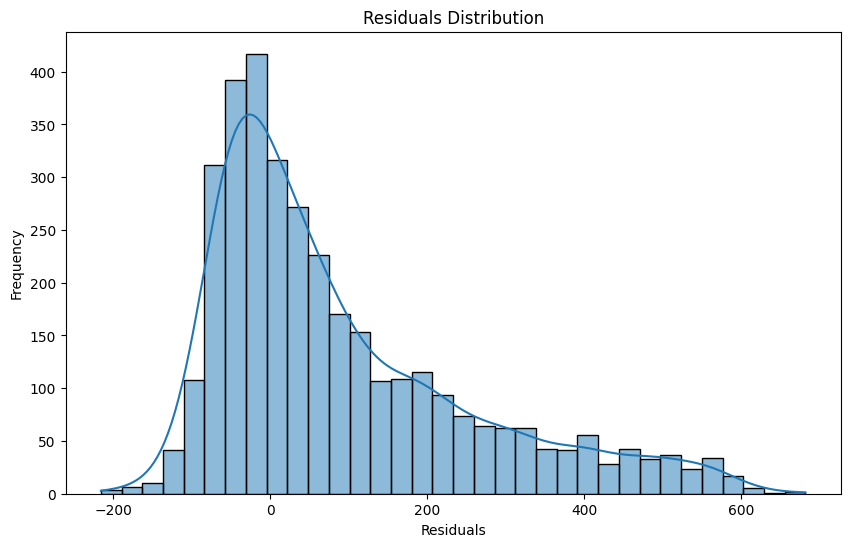

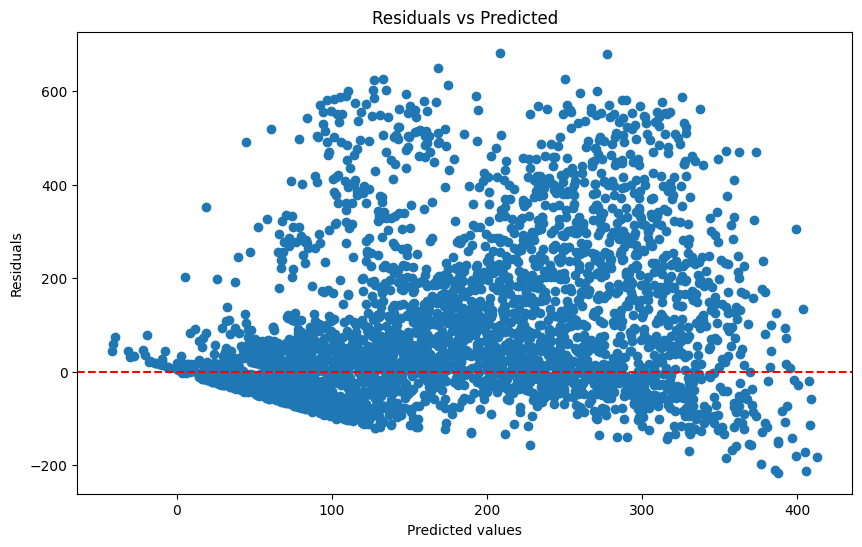

In [52]:
# Calculate residuals
residuals = y_val - y_val_pred

# Plotting residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plotting residuals vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_val_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


## Step 5


In [53]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor with default parameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the transformed training data
rf_model.fit(X_train_transformed, y_train)


RandomForestRegressor(random_state=42)

In [54]:
# Predict on validation set
y_val_rf_pred = rf_model.predict(X_val_transformed)

# Evaluate performance
rf_mse = mean_squared_error(y_val, y_val_rf_pred)
rf_mae = mean_absolute_error(y_val, y_val_rf_pred)
rf_r2 = r2_score(y_val, y_val_rf_pred)

# Print the metrics
print("Random Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"R² Score: {rf_r2}")


Random Forest Regressor Performance:
Mean Squared Error (MSE): 15778.916852630295
Mean Absolute Error (MAE): 91.04217505995204
R² Score: 0.6603058798546584


In [55]:
print("\n--- Comparison with Linear Regression ---")
print(f"Linear Regression R²: {r2:.4f}")
print(f"Random Forest R²: {rf_r2:.4f}")



--- Comparison with Linear Regression ---
Linear Regression R²: 0.2387
Random Forest R²: 0.6603


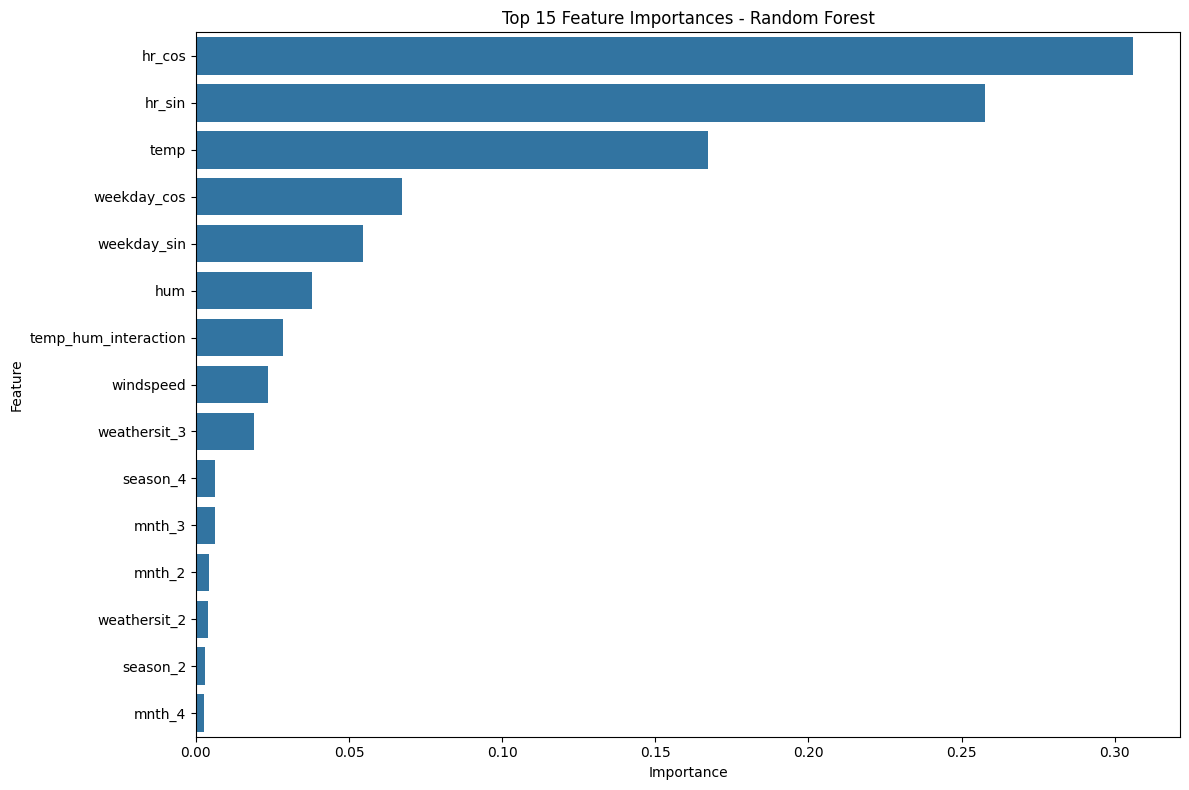

In [56]:
importances = rf_model.feature_importances_

# Get feature names from the pipeline
# You have one-hot encoded features, so we’ll extract all feature names
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_columns)
all_feature_names = list(ohe_feature_names) + continuous_columns + ['hr_sin', 'hr_cos', 'weekday_sin', 'weekday_cos']

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


## Task 6


In [64]:
!pip install lightgbm


In [65]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train_transformed, y_train)
y_val_lgb_pred = lgb_model.predict(X_val_transformed)


ModuleNotFoundError: No module named 'lightgbm'